In [1]:
import locusselect 
from locusselect.gapped_kmers import * 

In [21]:
kmer_len=6
num_gaps=1
filters, biases=generate_gapped_kmers(kmer_len,
                                          num_gaps,
                                          alphabet_size=4)    
embed_func=get_gapped_kmer_embedding_func(filters,biases)
impscores_filename="coordinates_0.K562_m1_r1.model.explanation.txt"
impscores = np.array([np.array( [[float(z) for z in y.split(",")]
                       for y in x.rstrip().split("\t")[2].split(";")])
                 for x in open(impscores_filename)])
one_hot=1.0*(np.abs(impscores)>0)
kmer_embeddings=embed_func(one_hot,impscores,batch_size=100,progress_update=True)
kmer_embeddings_rev=embed_func(one_hot[:,::-1,::-1],impscores[:,::-1,::-1],batch_size=100,progress_update=True)
summed_kmer_embeddings=kmer_embeddings+kmer_embeddings_rev
kmer_embeddings=summed_kmer_embeddings
np.savetxt("gkmexplain.coord.embeddings.txt",kmer_embeddings)


Done 0
Done 100
Done 200
Done 300
Done 400
Done 500
Done 600
Done 700
Done 800
Done 900
Done 1000
Done 1100
Done 1200
Done 1300
Done 1400
Done 1500
Done 1600
Done 1700
Done 1800
Done 1900
Done 2000
Done 2100
Done 2200
Done 2300
Done 2400
Done 2500
Done 2600
Done 2700
Done 2800
Done 2900
Done 3000
Done 3100
Done 3200
Done 3300
Done 3400
Done 3500
Done 3600
Done 3700
Done 3800
Done 3900
Done 4000
Done 4100
Done 4200
Done 4300
Done 4400
Done 4500
Done 4600
Done 4700
Done 4800
Done 4900
Done 5000
Done 5100
Done 5200
Done 5300
Done 5400
Done 5500
Done 5600
Done 5700
Done 5800
Done 5900
Done 6000
Done 6100
Done 6200
Done 6300
Done 6400
Done 6500
Done 6600
Done 6700
Done 6800
Done 6900
Done 7000
Done 7100
Done 7200
Done 7300
Done 7400
Done 7500
Done 7600
Done 7700
Done 7800
Done 7900
Done 8000
Done 0
Done 100
Done 200
Done 300
Done 400
Done 500
Done 600
Done 700
Done 800
Done 900
Done 1000
Done 1100
Done 1200
Done 1300
Done 1400
Done 1500
Done 1600
Done 1700
Done 1800
Done 1900
Done 2000
Done

In [30]:
np.savetxt("gkmexplain.coord.embeddings.txt",kmer_embeddings)

In [22]:
kmer_embeddings.shape

(8001, 5120)

In [7]:
!pip install vizsequence

  Stored in directory: /users/annashch/.cache/pip/wheels/08/eb/de/6b398b439ba39c278e5c341bdeed57d66280910e096496eaef
Successfully built vizsequence


In [25]:
impscores = np.array(impscores)
sorted_indices = sorted(enumerate(np.sum(impscores,axis=(1,2))), key=lambda x: -x[1])

In [26]:
filters.shape

(5120, 6, 4)

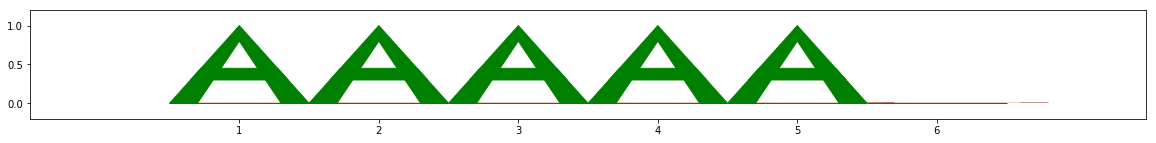

In [27]:
viz_sequence.plot_weights(filters[0])

In [28]:
kmer_embeddings.shape

(8001, 5120)

6939 6939 2.1547515819


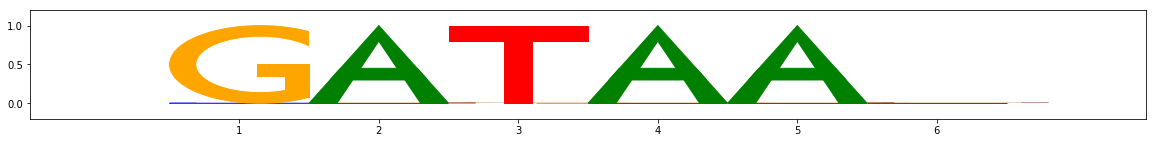

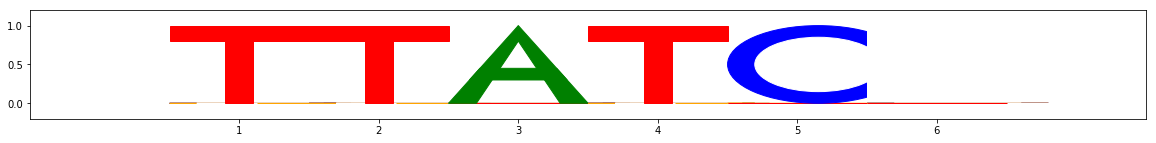

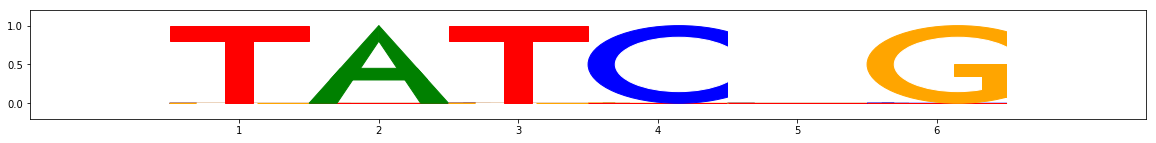

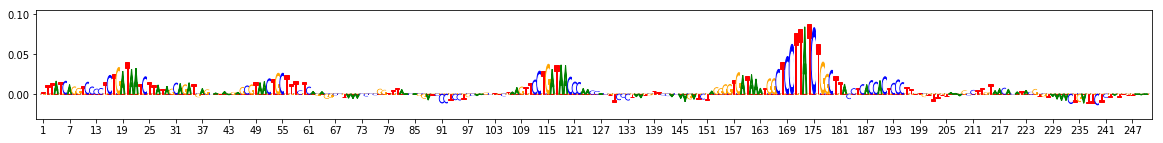

2527 2527 2.1480682673


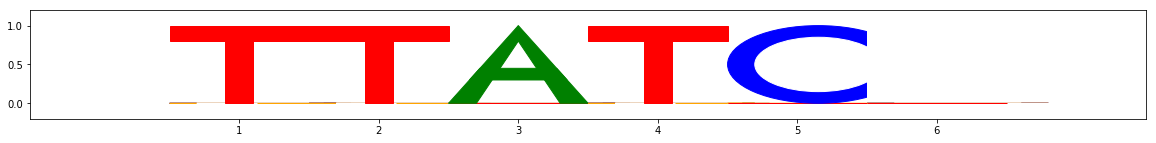

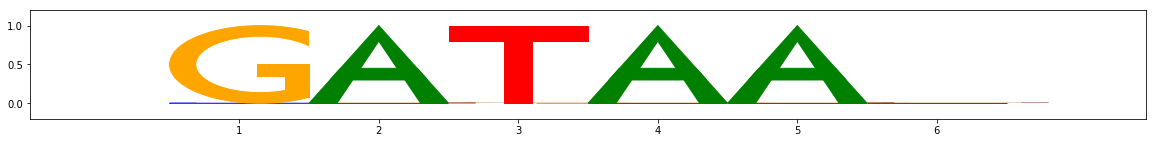

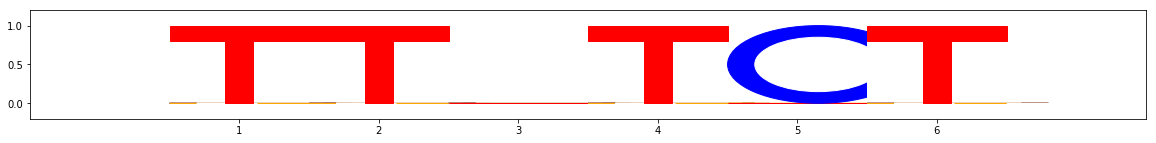

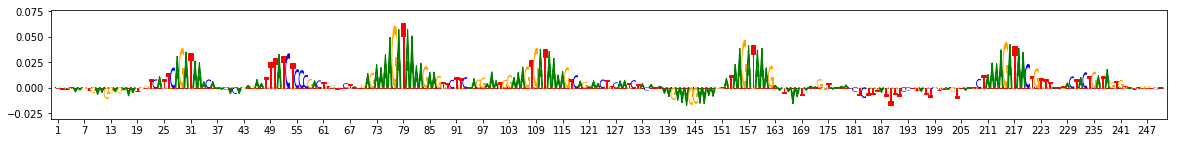

546 546 2.0094170683


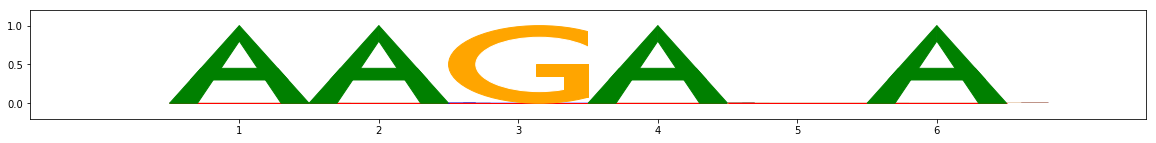

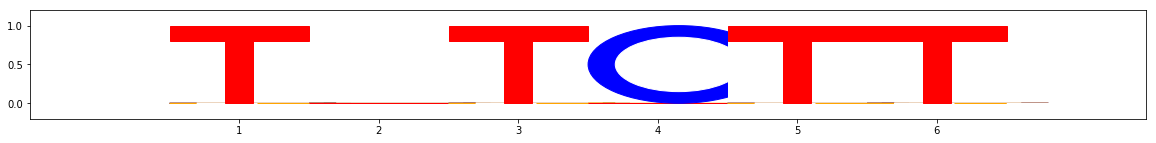

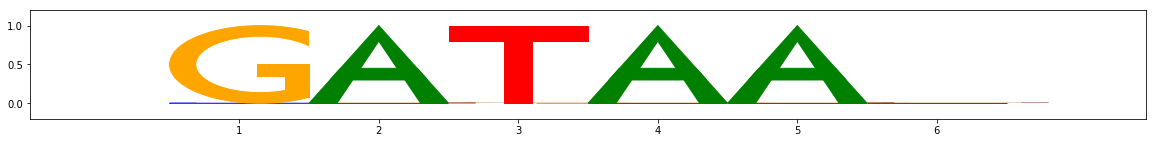

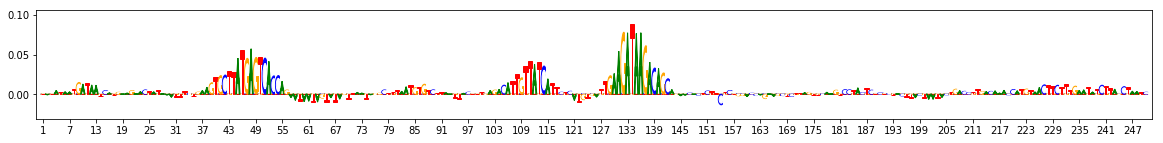

7669 7669 1.672061319


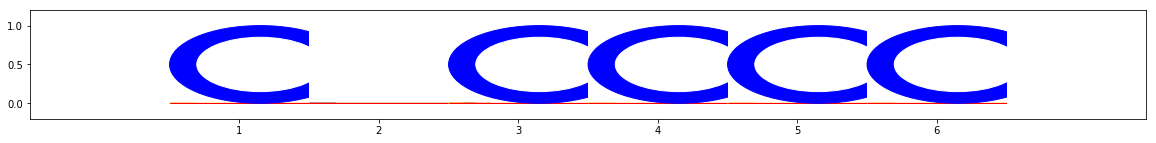

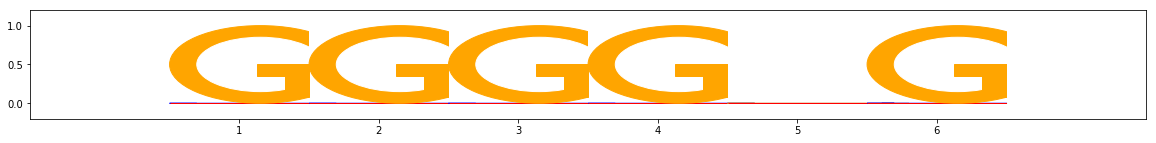

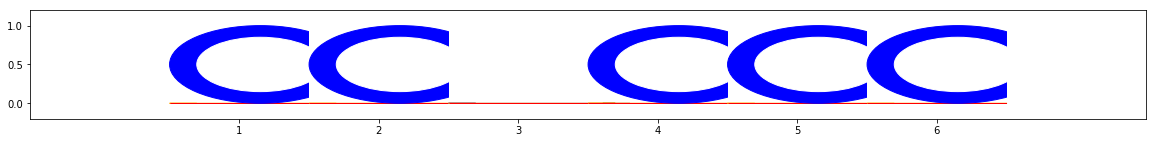

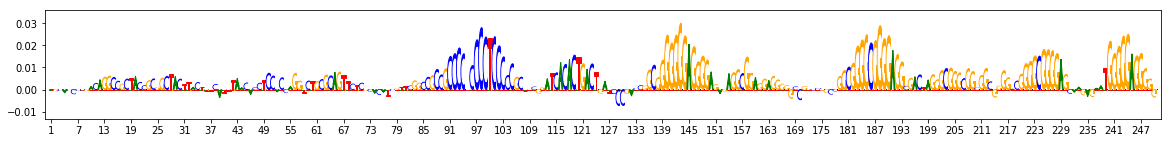

7580 7580 1.6231376544999998


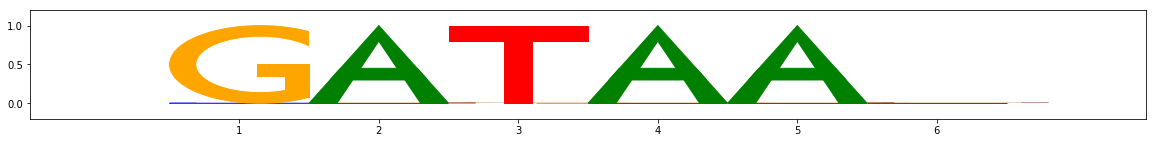

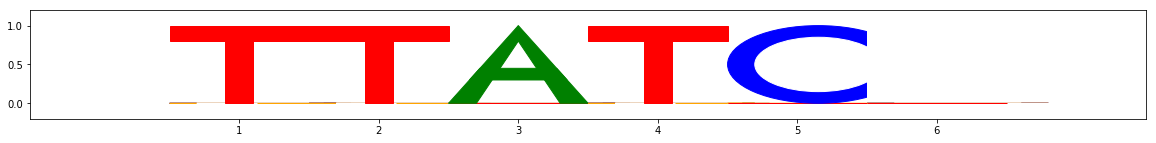

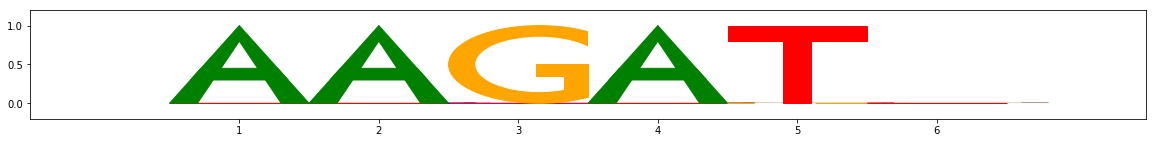

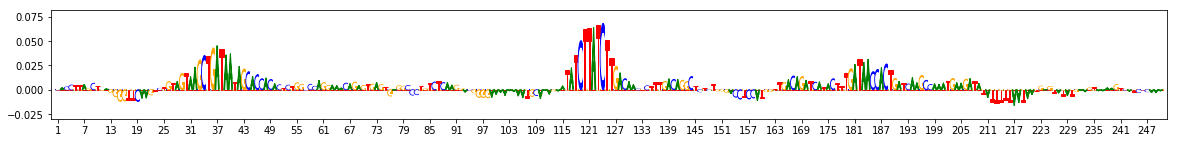

5149 5149 1.61966054391


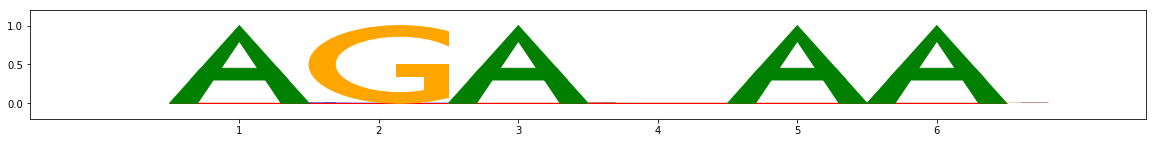

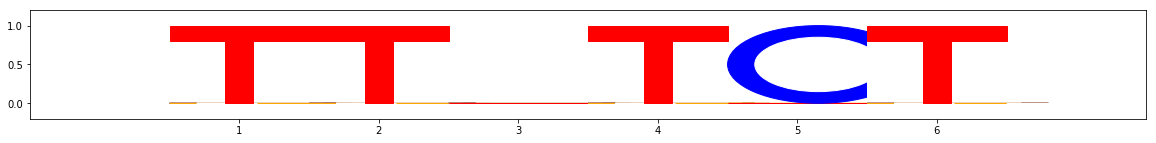

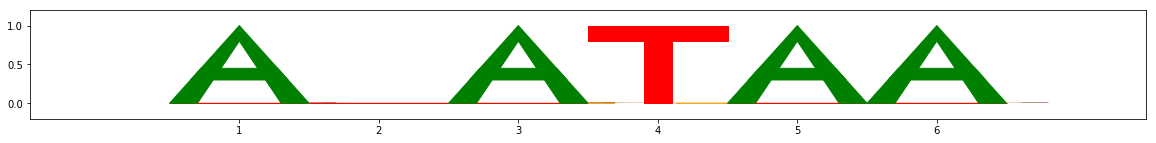

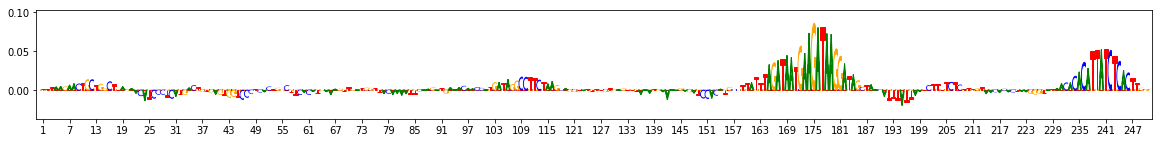

3478 3478 1.6095492939999998


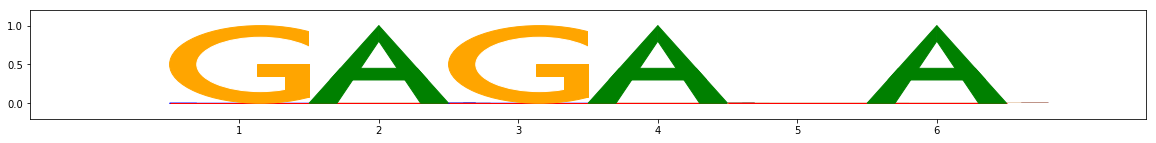

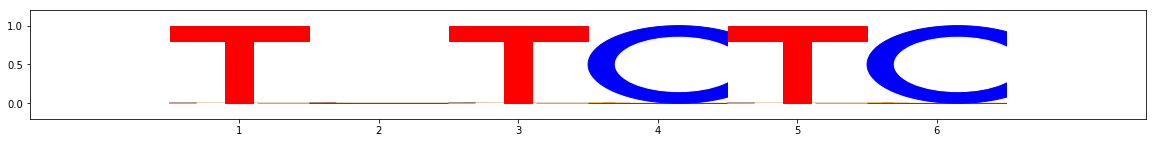

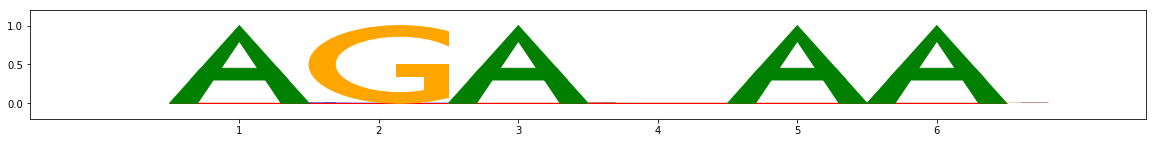

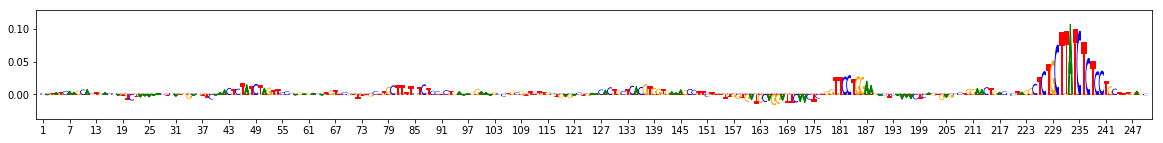

7906 7906 1.5898683201000001


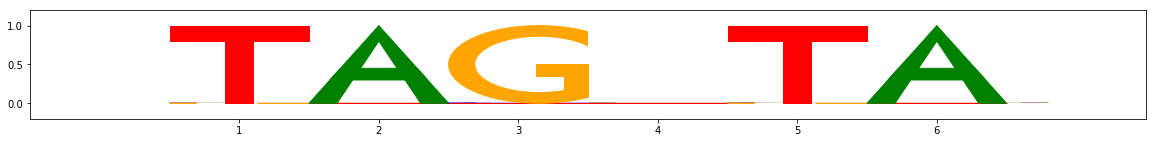

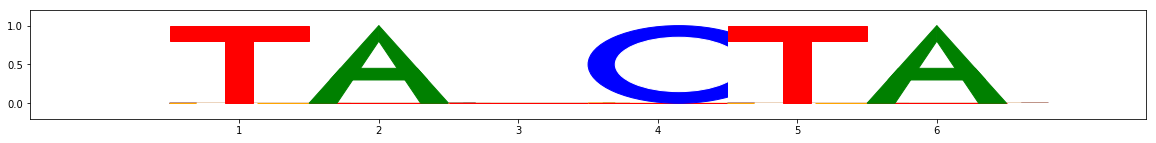

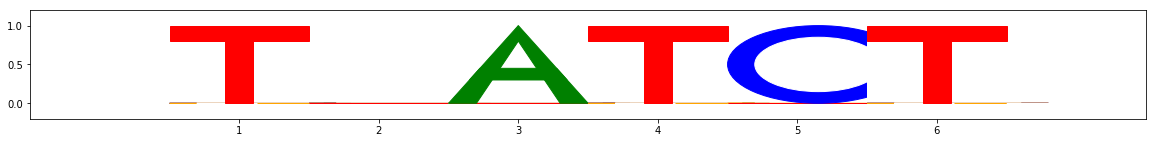

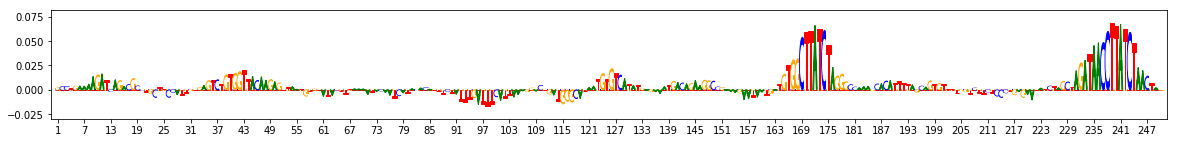

2695 2695 1.5488919422


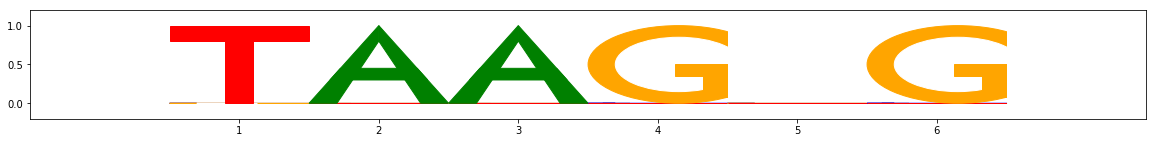

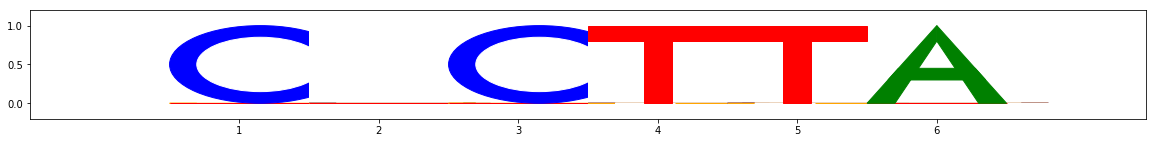

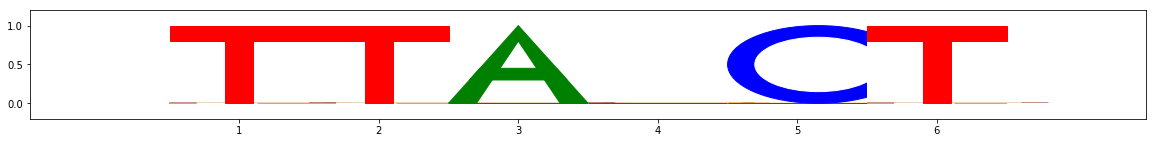

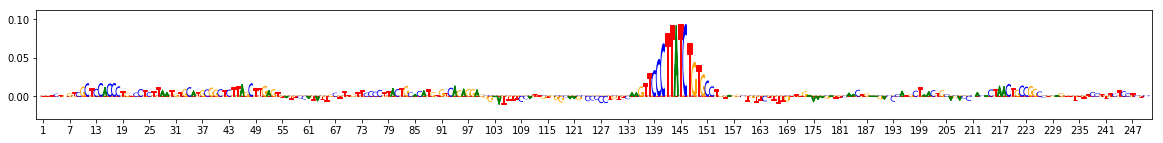

534 534 1.5397152880199998


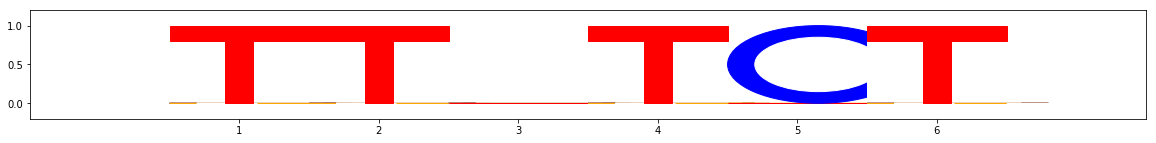

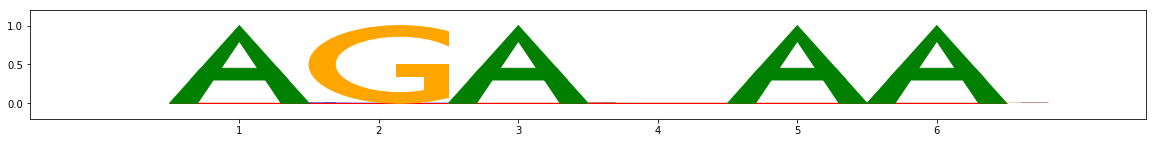

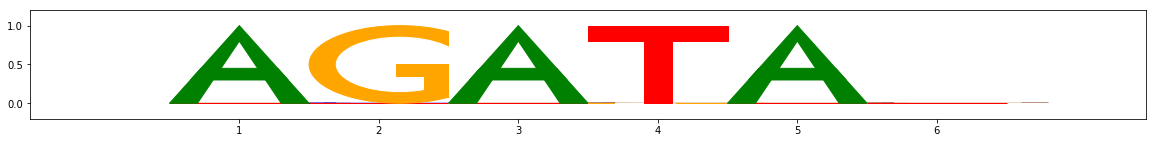

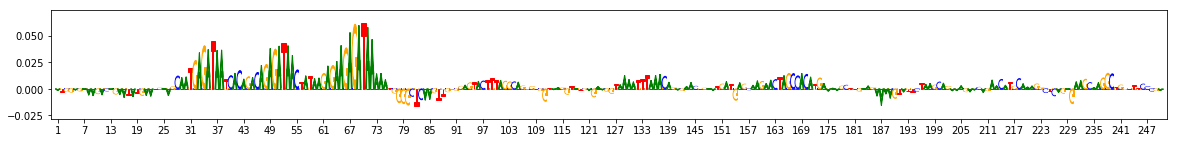

In [29]:
%matplotlib inline

for (idx,diffref) in sorted_indices[:10]:
    print(idx,idx,diffref)
    #print(fasta_coords[idx],idx,diffref)
    kmer_embed_idx=kmer_embeddings[idx]
    top_kmers=[i[0] for i in sorted(enumerate(kmer_embed_idx),key=lambda x: -x[1])]
    for kmer_index in top_kmers[:3]: 
        viz_sequence.plot_weights(filters[kmer_index])
    viz_sequence.plot_weights(impscores[idx])